In [17]:
import methods as me

In [18]:
#librairy 
import argparse 
from os import listdir
#visu
import matplotlib.pyplot as plt

# other files
import others.visualisation as kp_visu
import others.helpers as hp
from methods import *
import seaborn as sns

In [19]:
LABEL_LIST=listdir("Data/FrameToFrame/Json/")  
ALL_FILES=[]
for i in LABEL_LIST:
    FILES=listdir(("Data/FrameToFrame/Json/"+i))  
    FILES_=["Data/FrameToFrame/Json/"+i+"/"+s for s in FILES if s[-1]=="n"]
    ALL_FILES+=FILES_

In [20]:
def compare_recall(k,normalisation,conf_type,method_name,loss_conf_type,n_tree=2,norm_nan="mean_on_row",with_conf=True):
    recall_by_combi=[]
    combination=[(True,True,True),(False,True,False),(True,True,False),(False,True,True),(True,False,True),(False,False,True),(True,False,False)]    
    for p,a,s in combination:
        if method_name=="knn_modified":
            r=me.knn_modified(LABEL_LIST,ALL_FILES,"euclidean_distance_mean",k,normalisation,2,p,a,s,conf_type,with_conf,loss_conf_type=loss_conf_type,visu=False)
        elif method_name=="ann":
            r=me.ann(LABEL_LIST,ALL_FILES,k,normalisation,2,p,a,s,conf_type,"euclidean",n_tree=n_tree,norm_nan=norm_nan,with_conf=with_conf,visu=False)
        elif method_name=="pas":
            r=me.pas_eval(LABEL_LIST,ALL_FILES,k,15,"align_torso",normalisation,conf_type,2,with_conf)
        recall_by_combi.append(r)
        print((p,a,s),r)
    print("Best Recall is "+str(np.max(recall_by_combi))+" for Points, angle, segment ->"+str(combination[np.argmax(recall_by_combi)]))

###  Ann

In [5]:
print("No conf")
compare_recall(5,normalisation="none",conf_type="none",method_name="ann",norm_nan="fill_zero",with_conf=False)
compare_recall(5,normalisation="bbox_ratio_kept_center_core",conf_type="none",method_name="ann",norm_nan="mean_on_row",with_conf=False)
compare_recall(5,normalisation="bbox_ratio_kept_center_core",conf_type="mean",method_name="ann",norm_nan="mean_on_row",with_conf=True)



No conf
(True, True, True) 0.4423076923076923
(False, True, False) 0.5384615384615384
(True, True, False) 0.5
(False, True, True) 0.5
(True, False, True) 0.4807692307692308
(False, False, True) 0.34615384615384615
(True, False, False) 0.4807692307692308
Best Recall is 0.5384615384615384 for Points, angle, segment ->(False, True, False)
(True, True, True) 0.5769230769230769
(False, True, False) 0.5882352941176471
(True, True, False) 0.5961538461538461
(False, True, True) 0.5294117647058824
(True, False, True) 0.5192307692307693
(False, False, True) 0.37254901960784315
(True, False, False) 0.5769230769230769
Best Recall is 0.5961538461538461 for Points, angle, segment ->(True, True, False)
(True, True, True) 0.5769230769230769
(False, True, False) 0.5490196078431373
(True, True, False) 0.6153846153846154
(False, True, True) 0.5098039215686274
(True, False, True) 0.5769230769230769
(False, False, True) 0.47058823529411764
(True, False, False) 0.5769230769230769
Best Recall is 0.6153846153

In [7]:
print("Conf_mean-------------------------------------------")
compare_recall(5,normalisation="bbox_ratio_kept_center_core",conf_type="mean",method_name="ann",n_tree=2,norm_nan="mean_on_row",with_conf=True)
print("Conf_min-------------------------------------------")
compare_recall(5,normalisation="bbox_ratio_kept_center_core",conf_type="min",method_name="ann",n_tree=2,norm_nan="mean_on_row",with_conf=True)
print("Conf-------------------------------------------")
compare_recall(5,normalisation="bbox_ratio_kept_center_core",conf_type="mean",method_name="ann",n_tree=2,norm_nan="max",with_conf=True)
print("Conf-------------------------------------------")
compare_recall(5,normalisation="bbox_ratio_kept_center_core",conf_type="mean",method_name="ann",n_tree=2,norm_nan="min",with_conf=True)
print("Confrandom_uni-------------------------------------------")
compare_recall(5,normalisation="bbox_ratio_kept_center_core",conf_type="mean",method_name="ann",n_tree=2,norm_nan="random_uni",with_conf=True)
print("Confrandom_gauss-------------------------------------------")
compare_recall(5,normalisation="bbox_ratio_kept_center_core",conf_type="mean",method_name="ann",n_tree=2,norm_nan="random_gauss",with_conf=True)
print("Conf median-------------------------------------------")
compare_recall(5,normalisation="bbox_ratio_kept_center_core",conf_type="mean",method_name="ann",n_tree=2,norm_nan="median",with_conf=True)
print("Conf fill_zero ------------------------------------")
compare_recall(5,normalisation="bbox_ratio_kept_center_core",conf_type="mean",method_name="ann",n_tree=10,norm_nan="fill_zero",with_conf=True)

Conf_mean-------------------------------------------
(True, True, True) 0.5769230769230769
(False, True, False) 0.5490196078431373
(True, True, False) 0.6153846153846154
(False, True, True) 0.5098039215686274
(True, False, True) 0.5769230769230769
(False, False, True) 0.47058823529411764
(True, False, False) 0.5769230769230769
Best Recall is 0.6153846153846154 for Points, angle, segment ->(True, True, False)
Conf_min-------------------------------------------
(True, True, True) 0.5576923076923077
(False, True, False) 0.5490196078431373
(True, True, False) 0.6153846153846154
(False, True, True) 0.47058823529411764
(True, False, True) 0.5769230769230769
(False, False, True) 0.47058823529411764
(True, False, False) 0.5769230769230769
Best Recall is 0.6153846153846154 for Points, angle, segment ->(True, True, False)
Conf-------------------------------------------
(True, True, True) 0.5192307692307693
(False, True, False) 0.5490196078431373
(True, True, False) 0.5
(False, True, True) 0.4509

In [20]:
compare_recall(5,normalisation="none",conf_type="mean",method_name="ann",n_tree=4,norm_nan="mean_on_row",with_conf=True)
compare_recall(5,normalisation="bbox_ratio_kept",conf_type="mean",method_name="ann",n_tree=4,norm_nan="mean_on_row",with_conf=True)
compare_recall(5,normalisation="bbox_ratio_kept_center_core",conf_type="mean",method_name="ann",n_tree=4,norm_nan="mean_on_row",with_conf=True)

(True, True, True) 0.5576923076923077
(False, True, False) 0.5576923076923077
(True, True, False) 0.5192307692307693
(False, True, True) 0.5576923076923077
(True, False, True) 0.5576923076923077
(False, False, True) 0.3269230769230769
(True, False, False) 0.5576923076923077
Best Recall is 0.5576923076923077 for Points, angle, segment ->(True, True, True)
(True, True, True) 0.5576923076923077
(False, True, False) 0.5576923076923077
(True, True, False) 0.5192307692307693
(False, True, True) 0.5576923076923077
(True, False, True) 0.5576923076923077
(False, False, True) 0.3269230769230769
(True, False, False) 0.5576923076923077
Best Recall is 0.5576923076923077 for Points, angle, segment ->(True, True, True)
(True, True, True) 0.5576923076923077
(False, True, False) 0.5490196078431373
(True, True, False) 0.5769230769230769
(False, True, True) 0.49019607843137253
(True, False, True) 0.5576923076923077
(False, False, True) 0.4117647058823529
(True, False, False) 0.5576923076923077
Best Recal

### Knn modif

In [21]:
k=5

In [23]:
me.knn_modified(LABEL_LIST,ALL_FILES,"euclidean_distance_mean",k,"none",2,True,True,False,"none",False,loss_conf_type="none",visu=True)

0.5

In [ ]:
me.knn_modified(LABEL_LIST,ALL_FILES,"euclidean_distance_mean",k,"none",2,True,True,False,"none",False,loss_conf_type="none",visu=False)

In [24]:
print("No conf No norm")
compare_recall(5,normalisation="none",conf_type="none",method_name="knn_modified",with_conf=False,loss_conf_type="none")


No conf No norm


TypeError: compare_recall() got an unexpected keyword argument 'loss_conf_type'

In [15]:
print("With norm")
compare_recall(5,normalisation="bbox_ratio_kept",conf_type="none",method_name="knn_modified",with_conf=False)

With norm
(True, True, True) 0.6346153846153846
(False, True, False) 0.5769230769230769
(True, True, False) 0.7307692307692307
(False, True, True) 0.6153846153846154
(True, False, True) 0.6730769230769231
(False, False, True) 0.5384615384615384
(True, False, False) 0.6923076923076923
Best Recall is 0.7307692307692307 for Points, angle, segment ->(True, True, False)


In [16]:

print("with norm and conf")
compare_recall(5,normalisation="bbox_ratio_kept",conf_type="mean",method_name="knn_modified",with_conf=True)

with norm and conf
(True, True, True) 0.6153846153846154
(False, True, False) 0.5769230769230769
(True, True, False) 0.6923076923076923
(False, True, True) 0.5769230769230769
(True, False, True) 0.6730769230769231
(False, False, True) 0.5576923076923077
(True, False, False) 0.6346153846153846
Best Recall is 0.6923076923076923 for Points, angle, segment ->(True, True, False)


Recall is equal to: 0.6153846153846154
The time to execute the PAS modified method is : 
291.01992297172546 seconds


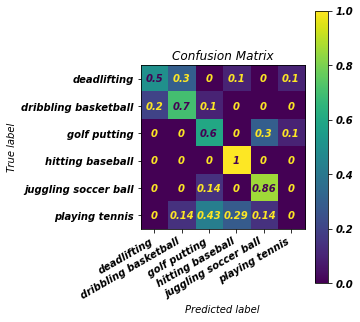

(True, True, True) None


KeyboardInterrupt: 

In [7]:
compare_recall(5,normalisation="bbox_ratio_kept",conf_type="mean",method_name="pas")

# Analysis of the confidence by class

In [18]:
lab="golf putting"
BASE_PATH ="Data/Train/"+lab+"/"
FILES_DL=listdir(BASE_PATH)
FILES_by_lab=list(filter(lambda x: x.endswith(".json"),FILES_DL))
FILE=BASE_PATH+FILES_by_lab[0]

In [19]:
FILE

'Data/Train/golf putting/2aIHmFN5OOA_openpifpaf.json'

In [21]:
df=pd.read_json(FILE,lines=True)
mask_nonempty=df.predictions.apply(lambda x: len(x)!=0)
df=df[mask_nonempty].reset_index().drop("index",axis=1)

In [3]:
def get_confByFile(FILE):
    '''
    Input: FILE Path from a video where we want to extract the confidence
    Output: Confidence array for all the skelettons keypoint and all the frame of the video
    '''
    
    df=pd.read_json(FILE,lines=True)
    mask_nonempty=df.predictions.apply(lambda x: len(x)!=0)
    df=df[mask_nonempty].reset_index().drop("index",axis=1)
    if df.empty==False:
        df["keypoints"]=df.predictions.apply(lambda x: np.array(x[0].get("keypoints")).reshape(17,3))
        conf=[skeleton[:,2] for skeleton in df.keypoints]
        conf_ar=np.concatenate([conf])
        return conf_ar
    elif df.empty==True:
        return np.array([17*[np.nan]])


In [4]:
LABELS=listdir("Data/Train")
print(LABELS,end="")

['deadlifting', 'dribbling basketball', 'golf putting', 'hitting baseball', 'juggling soccer ball', 'playing tennis', 'train']

In [5]:
conf_all=pd.DataFrame()
for lab in LABELS[:-1]:
    BASE_PATH ="Data/Train/"+lab+"/"
    FILES_DL=listdir(BASE_PATH)
    FILES_by_lab=list(filter(lambda x: x.endswith(".json"),FILES_DL))
    conf_by_lab=[get_confByFile(BASE_PATH+FILE) for FILE in FILES_by_lab]
    conf_df=pd.DataFrame(np.concatenate(conf_by_lab))
    conf_df["label"]=lab
    conf_all=pd.concat([conf_all,conf_df])
    

In [6]:
conf_all["zero_conf"]=(conf_all == 0).sum(axis=1)
conf_all["all_conf"]=(conf_all).count(axis=1)

In [7]:
stat=conf_all.groupby(["label"]).sum()[["zero_conf","all_conf"]]
stat["ratio_delete"]=stat["zero_conf"]/stat["all_conf"]


In [8]:
stat

,zero_conf,all_conf,ratio_delete
label,,,
deadlifting,14325,82517,0.173601
dribbling basketball,16870,128611,0.131171
golf putting,19036,89741,0.212122
hitting baseball,19675,109155,0.180248
juggling soccer ball,9902,53713,0.184350
playing tennis,23800,153674,0.154873


In [9]:
conf_all

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,label,zero_conf,all_conf
0,0.54,0.00,0.83,0.00,1.00,0.48,0.99,0.33,0.89,0.40,0.77,0.80,0.96,0.67,0.95,0.68,0.91,deadlifting,2,19
1,0.60,0.00,0.85,0.00,1.00,0.69,0.99,0.00,0.93,0.00,0.82,0.82,0.97,0.81,0.96,0.00,0.93,deadlifting,5,19
2,0.83,0.00,0.99,0.00,1.00,0.79,0.98,0.00,0.96,0.00,0.83,0.89,0.95,0.72,0.96,0.00,0.88,deadlifting,5,19
3,0.85,0.00,0.99,0.00,1.00,0.75,0.98,0.00,0.96,0.00,0.82,0.92,0.95,0.62,0.94,0.42,0.88,deadlifting,4,19
4,0.82,0.00,0.88,0.00,0.89,0.67,0.92,0.37,0.99,0.00,1.00,0.88,0.91,0.65,0.93,0.53,0.82,deadlifting,3,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8084,0.61,0.81,0.00,0.97,0.00,1.00,0.99,0.95,0.98,0.95,0.95,0.99,0.99,0.99,0.98,0.99,0.97,playing tennis,2,19
8085,0.49,0.65,0.00,0.97,0.00,0.99,1.00,0.98,0.99,0.97,0.96,0.99,0.99,0.98,0.98,0.98,0.95,playing tennis,2,19
8086,0.55,0.65,0.00,0.92,0.00,0.99,1.00,0.94,0.99,0.94,0.95,0.98,0.99,0.98,0.98,0.98,0.96,playing tennis,2,19
8087,0.42,0.49,0.00,0.86,0.00,0.98,1.00,0.97,0.91,0.94,0.00,0.97,0.99,0.96,0.96,0.95,0.69,playing tennis,3,19


Text(0.5, 1.0, 'Confidence between OpenPifPaf Keypoints')

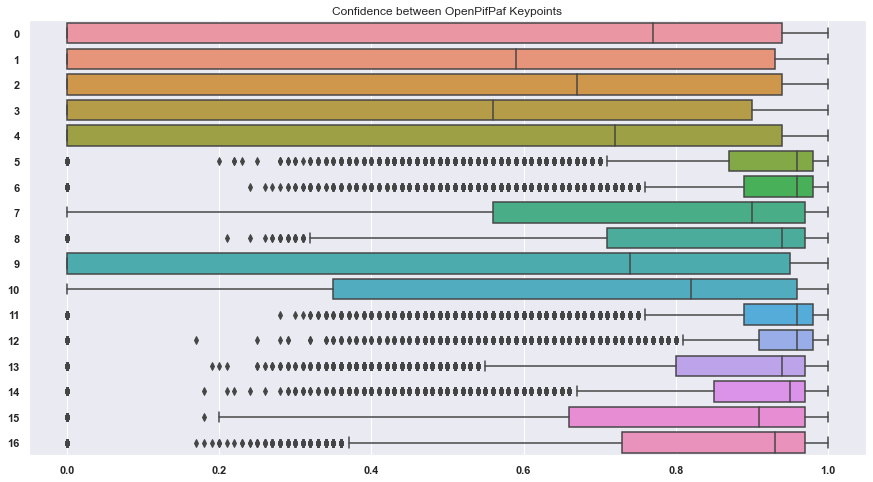

In [27]:
sns.set_theme()
plt.figure(figsize=(15,8))
sns.boxplot(data=conf_all.iloc[::,0:17],orient="h")
plt.title("Confidence between OpenPifPaf Keypoints")

c:\Users\41789\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


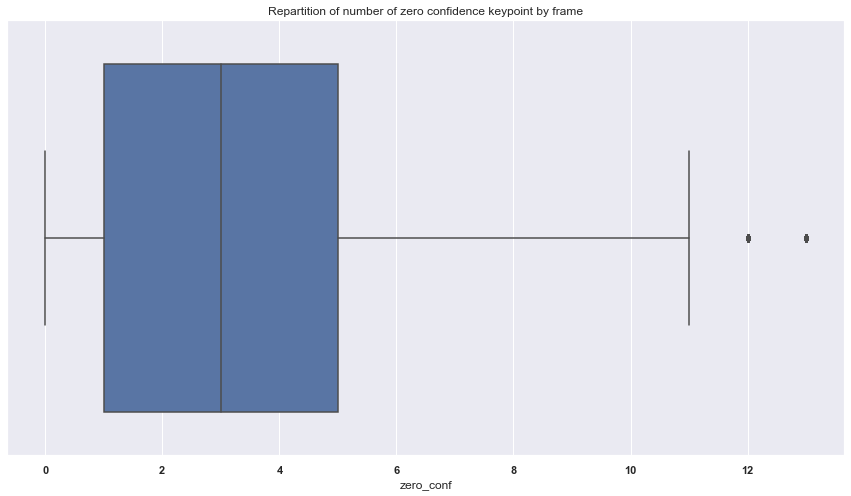

In [11]:
sns.set_theme()
plt.figure(figsize=(15,8))
sns.boxplot(conf_all.zero_conf)
plt.title("Repartition of number of zero confidence keypoint by frame")
plt.show()

In [12]:
conf_all

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,label,zero_conf,all_conf
0,0.54,0.00,0.83,0.00,1.00,0.48,0.99,0.33,0.89,0.40,0.77,0.80,0.96,0.67,0.95,0.68,0.91,deadlifting,2,19
1,0.60,0.00,0.85,0.00,1.00,0.69,0.99,0.00,0.93,0.00,0.82,0.82,0.97,0.81,0.96,0.00,0.93,deadlifting,5,19
2,0.83,0.00,0.99,0.00,1.00,0.79,0.98,0.00,0.96,0.00,0.83,0.89,0.95,0.72,0.96,0.00,0.88,deadlifting,5,19
3,0.85,0.00,0.99,0.00,1.00,0.75,0.98,0.00,0.96,0.00,0.82,0.92,0.95,0.62,0.94,0.42,0.88,deadlifting,4,19
4,0.82,0.00,0.88,0.00,0.89,0.67,0.92,0.37,0.99,0.00,1.00,0.88,0.91,0.65,0.93,0.53,0.82,deadlifting,3,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8084,0.61,0.81,0.00,0.97,0.00,1.00,0.99,0.95,0.98,0.95,0.95,0.99,0.99,0.99,0.98,0.99,0.97,playing tennis,2,19
8085,0.49,0.65,0.00,0.97,0.00,0.99,1.00,0.98,0.99,0.97,0.96,0.99,0.99,0.98,0.98,0.98,0.95,playing tennis,2,19
8086,0.55,0.65,0.00,0.92,0.00,0.99,1.00,0.94,0.99,0.94,0.95,0.98,0.99,0.98,0.98,0.98,0.96,playing tennis,2,19
8087,0.42,0.49,0.00,0.86,0.00,0.98,1.00,0.97,0.91,0.94,0.00,0.97,0.99,0.96,0.96,0.95,0.69,playing tennis,3,19


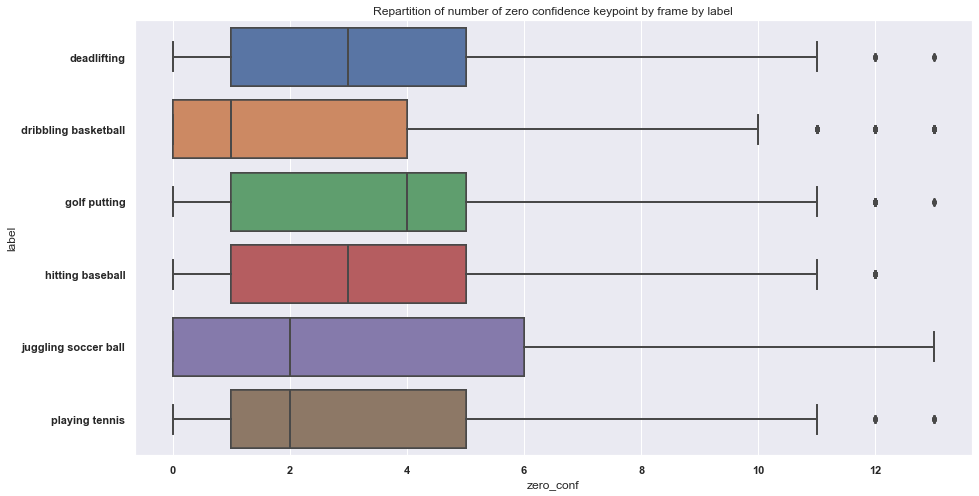

In [13]:
sns.set_theme()
plt.figure(figsize=(15,8))
for i in LABELS:
    sns.boxplot(x="zero_conf",y="label",data=conf_all)
plt.title("Repartition of number of zero confidence keypoint by frame by label")
plt.show()